In [85]:
from sqlalchemy import create_engine, inspect
import pandas as pd

# Path to the database file
db_path = './cademycode.db'

# Create a database engine
engine = create_engine(f'sqlite:///{db_path}')

In [86]:
# inspector to get the list of tables
inspector = inspect(engine)
tables = inspector.get_table_names()

In [87]:
print(tables)

['cademycode_courses', 'cademycode_student_jobs', 'cademycode_students']


In [88]:
# Import each table into a DataFrame
dataframes = {}

for table in tables:
    df = pd.read_sql_table(table, engine)
    dataframes[table] = df
    print(f"Data from {table}:")
    print(df.head())

# Now all the tables have been loaded into DataFrames stored in the `dataframes` dictionary

Data from cademycode_courses:
   career_path_id      career_path_name  hours_to_complete
0               1        data scientist                 20
1               2         data engineer                 20
2               3          data analyst                 12
3               4  software engineering                 25
4               5      backend engineer                 18
Data from cademycode_student_jobs:
   job_id        job_category  avg_salary
0       1           analytics       86000
1       2            engineer      101000
2       3  software developer      110000
3       4            creative       66000
4       5  financial services      135000
Data from cademycode_students:
   uuid             name         dob sex  \
0     1  Annabelle Avery  1943-07-03   F   
1     2      Micah Rubio  1991-02-07   M   
2     3       Hosea Dale  1989-12-07   M   
3     4     Mariann Kirk  1988-07-31   F   
4     5  Lucio Alexander  1963-08-31   M   

                                 

In [89]:
df_courses = dataframes.get('cademycode_courses', pd.DataFrame())
df_jobs = dataframes.get('cademycode_student_jobs', pd.DataFrame())
df_students = dataframes.get('cademycode_students', pd.DataFrame())

There are three tables in database and ow all the tables have been loaded into DataFrames. Let's explore the DataFrames

1. df_courses

In [90]:
# inspect df_courses
df_courses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   career_path_id     10 non-null     int64 
 1   career_path_name   10 non-null     object
 2   hours_to_complete  10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 372.0+ bytes


In [91]:
print(df_courses)

   career_path_id           career_path_name  hours_to_complete
0               1             data scientist                 20
1               2              data engineer                 20
2               3               data analyst                 12
3               4       software engineering                 25
4               5           backend engineer                 18
5               6          frontend engineer                 20
6               7              iOS developer                 27
7               8          android developer                 27
8               9  machine learning engineer                 35
9              10             ux/ui designer                 15


There is no duplicates and null values in df_courses and all the data looks suitable for later analysis

2. df_jobs

In [93]:
# inspect df_jobs
df_jobs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   job_id        10 non-null     int64 
 1   job_category  10 non-null     object
 2   avg_salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 372.0+ bytes


In [94]:
print(df_jobs)

   job_id        job_category  avg_salary
0       1           analytics       86000
1       2            engineer      101000
2       3  software developer      110000
3       4            creative       66000
4       5  financial services      135000
5       6           education       61000
6       7                  HR       80000
7       8             student       10000
8       9          healthcare      120000
9       0               other       80000


There are some duplicates in this DataFrame that we can remove

In [95]:
# Checking for duplicates
duplicates = df_jobs.duplicated()

# Display the duplicate rows
df_jobs[duplicates]

,job_id,job_category,avg_salary


In [96]:
# drop duplicates
cleaned_df_jobs = df_jobs.drop_duplicates()
print(cleaned_df_jobs)

   job_id        job_category  avg_salary
0       1           analytics       86000
1       2            engineer      101000
2       3  software developer      110000
3       4            creative       66000
4       5  financial services      135000
5       6           education       61000
6       7                  HR       80000
7       8             student       10000
8       9          healthcare      120000
9       0               other       80000


In [97]:
import matplotlib.pyplot as plt


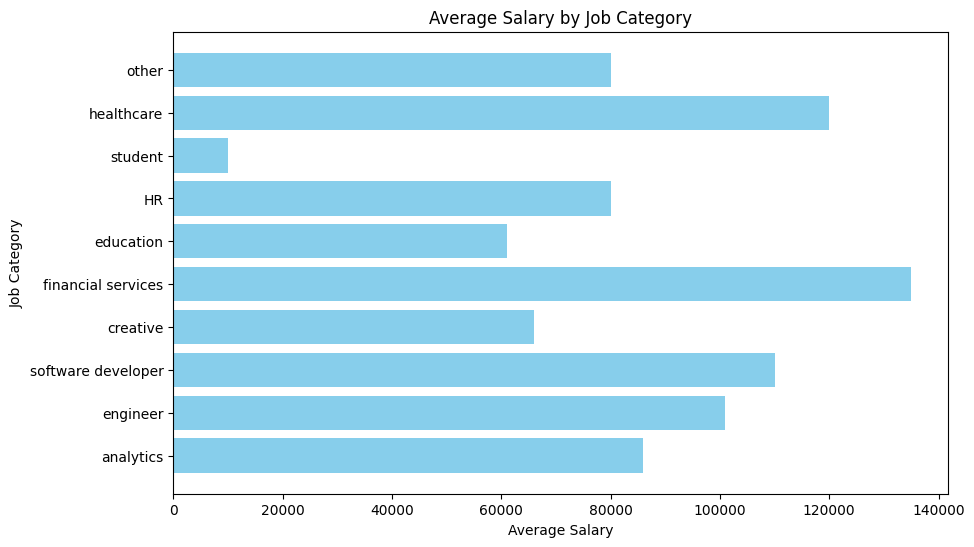

In [98]:
# Plotting the bar plot
plt.figure(figsize=(10, 6))
plt.barh(cleaned_df_jobs['job_category'], cleaned_df_jobs['avg_salary'], color='skyblue')

# Adding title and labels
plt.title('Average Salary by Job Category')
plt.xlabel('Average Salary')
plt.ylabel('Job Category')

# Display the plot
plt.show()

3. df_students

In [99]:
# inspect df_students
df_students.head()

,uuid,name,dob,sex,contact_info,job_id,num_course_taken,current_career_path_id,time_spent_hrs
0,1,Annabelle Avery,1943-07-03,F,"{""mailing_address"": ""303 N Timber Key, Irondal...",7,6,1,4.99
1,2,Micah Rubio,1991-02-07,M,"{""mailing_address"": ""767 Crescent Fair, Shoals...",7,5,8,4.40
2,3,Hosea Dale,1989-12-07,M,"{""mailing_address"": ""P.O. Box 41269, St. Bonav...",7,8,8,6.74
3,4,Mariann Kirk,1988-07-31,F,"{""mailing_address"": ""517 SE Wintergreen Isle, ...",6,7,9,12.31
4,5,Lucio Alexander,1963-08-31,M,"{""mailing_address"": ""18 Cinder Cliff, Doyles b...",7,14,3,5.64


In [100]:
df_students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4293 entries, 0 to 4292
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   uuid                    4293 non-null   int64  
 1   name                    4293 non-null   object 
 2   dob                     4293 non-null   object 
 3   sex                     4293 non-null   object 
 4   contact_info            4293 non-null   object 
 5   job_id                  4293 non-null   int64  
 6   num_course_taken        4293 non-null   int64  
 7   current_career_path_id  4293 non-null   int64  
 8   time_spent_hrs          4293 non-null   float64
dtypes: float64(1), int64(4), object(4)
memory usage: 302.0+ KB


There are null values and data types may need to be changed

1. Remove null values

In [102]:
null_counts = df_students.isnull().sum()

# Display the count of null values per column
print(null_counts)

uuid                      0
name                      0
dob                       0
sex                       0
contact_info              0
job_id                    0
num_course_taken          0
current_career_path_id    0
time_spent_hrs            0
dtype: int64


In [103]:
# Retrieve rows with any null values
rows_with_nulls = df_students[df_students.isnull().any(axis=1)]

# Display the rows with null values
print(rows_with_nulls)

Empty DataFrame
Columns: [uuid, name, dob, sex, contact_info, job_id, num_course_taken, current_career_path_id, time_spent_hrs]
Index: []


We have 707 rows that have null values: 471 with no career path id and hours spent in the path and 251 rows with null values in num_course_taken. I can assume that if the current_career_path_id is null then time_spent_hrs is also null.


In [104]:
# Check for rows where both 'current_career_path_id' and 'time_spent_hrs' are null
count_both_nulls = df_students[df_students['current_career_path_id'].isnull() & df_students['time_spent_hrs'].isnull()].shape[0]

# Display the count
print(count_both_nulls)

0


In [105]:
# Check for rows where both 'current_career_path_id' and 'num_course_taken' are null
count_both_nulls2 = df_students[df_students['current_career_path_id'].isnull() & df_students['num_course_taken'].isnull()].shape[0]

# Display the count
print(count_both_nulls2)

0


I assume the purpose is to analyse active students so I decide to delete these null values

In [106]:
df_students_dropped = df_students.dropna(subset=['job_id', 'num_course_taken', 'current_career_path_id', 'time_spent_hrs'])
print(df_students_dropped.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4293 entries, 0 to 4292
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   uuid                    4293 non-null   int64  
 1   name                    4293 non-null   object 
 2   dob                     4293 non-null   object 
 3   sex                     4293 non-null   object 
 4   contact_info            4293 non-null   object 
 5   job_id                  4293 non-null   int64  
 6   num_course_taken        4293 non-null   int64  
 7   current_career_path_id  4293 non-null   int64  
 8   time_spent_hrs          4293 non-null   float64
dtypes: float64(1), int64(4), object(4)
memory usage: 302.0+ KB
None


2. Change the datatypes

In [107]:
import json

df_clean_students = df_students_dropped.copy()

df_clean_students['dob'] = pd.to_datetime(df_clean_students['dob'], errors='coerce')
df_clean_students['job_id'] = pd.to_numeric(df_clean_students['job_id'], errors='coerce')
df_clean_students['num_course_taken'] = pd.to_numeric(df_clean_students['num_course_taken'], errors='coerce')
df_clean_students['current_career_path_id'] = pd.to_numeric(df_clean_students['current_career_path_id'], errors='coerce')
df_clean_students['time_spent_hrs'] = pd.to_numeric(df_clean_students['time_spent_hrs'], errors='coerce')

df_clean_students['dob'] = df_clean_students['dob'].astype('datetime64[ns]')
df_clean_students['job_id'] = df_clean_students['job_id'].astype(int)
df_clean_students['num_course_taken'] = df_clean_students['num_course_taken'].astype(int)
df_clean_students['current_career_path_id'] = df_clean_students['current_career_path_id'].astype(int)
df_clean_students['time_spent_hrs'] = df_clean_students['time_spent_hrs'].astype(float)
df_clean_students['contact_info'] = df_clean_students['contact_info'].apply(json.dumps)

print(df_clean_students.info())
print(df_clean_students.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4293 entries, 0 to 4292
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   uuid                    4293 non-null   int64         
 1   name                    4293 non-null   object        
 2   dob                     4293 non-null   datetime64[ns]
 3   sex                     4293 non-null   object        
 4   contact_info            4293 non-null   object        
 5   job_id                  4293 non-null   int32         
 6   num_course_taken        4293 non-null   int32         
 7   current_career_path_id  4293 non-null   int32         
 8   time_spent_hrs          4293 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int32(3), int64(1), object(3)
memory usage: 251.7+ KB
None
   uuid             name        dob sex  \
0     1  Annabelle Avery 1943-07-03   F   
1     2      Micah Rubio 1991-02-07   M   
2     3

Check the categorical columns 'sex'

In [108]:
unique_sex_values = df_clean_students['sex'].unique()

# Display the unique values in the 'sex' column
print(unique_sex_values)


['F' 'M' 'N']


In [109]:
# Filter rows where 'sex' is 'N'
rows_with_N = df_clean_students[df_clean_students['sex'] == 'N']

# Display the filtered rows
print(rows_with_N)

      uuid                  name        dob sex  \
9       10  Regenia van der Helm 1999-02-23   N   
12      13     Edwardo Boonzayer 1975-05-23   N   
36      42      Lynwood Adenrock 1952-03-30   N   
44      51      Valorie Rijnberk 1986-09-06   N   
45      53             Ted Groot 1950-06-06   N   
...    ...                   ...        ...  ..   
4270  4976          Jesusa Vonck 1979-06-10   N   
4272  4978      Johnsie Petersen 1998-06-18   N   
4282  4990        Macie Goudkade 1997-02-11   N   
4288  4996      Quentin van Harn 1967-07-07   N   
4291  4999      Donnetta Dillard 1943-02-12   N   

                                           contact_info  job_id  \
9     "{\"mailing_address\": \"220 Middle Ridge, Fal...       5   
12    "{\"mailing_address\": \"147 SW Plain, Solana ...       2   
36    "{\"mailing_address\": \"P.O. Box 68680, Minne...       7   
44    "{\"mailing_address\": \"421 Iron End Motorway...       1   
45    "{\"mailing_address\": \"P.O. Box 14285, Hawor

There are 881 students whose gender is marked as 'N'. Since we cannot tell if this is a mistake or not, we assume that it is considered as 'Not assigned'

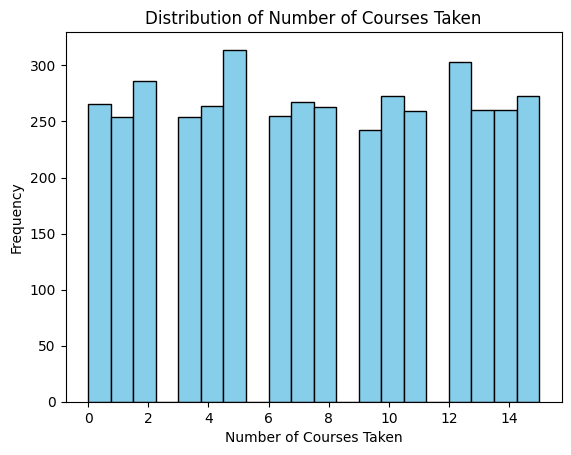

In [112]:
df_clean_students['num_course_taken'].plot(kind='hist', bins=20, color='skyblue', edgecolor='black', title='Distribution of Number of Courses Taken')
plt.xlabel('Number of Courses Taken')
plt.ylabel('Frequency')
plt.show()


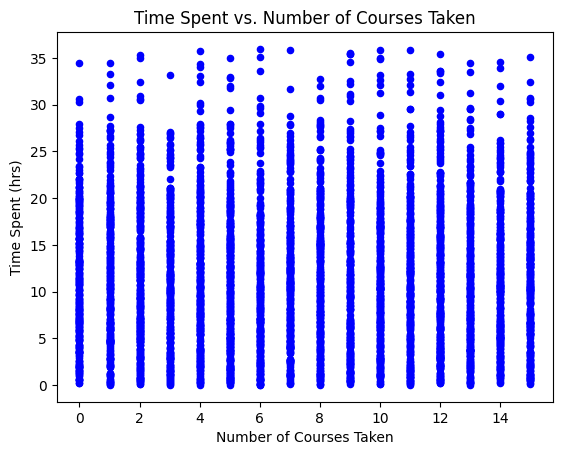

In [114]:
df_clean_students.plot(kind='scatter', x='num_course_taken', y='time_spent_hrs', color='blue', title='Time Spent vs. Number of Courses Taken')
plt.xlabel('Number of Courses Taken')
plt.ylabel('Time Spent (hrs)')
plt.show()


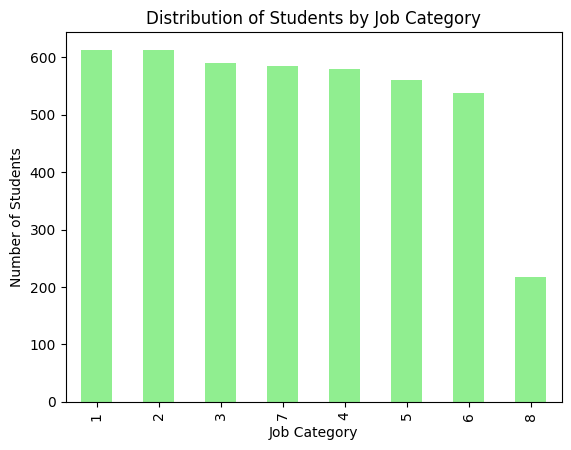

In [115]:
df_students['job_id'].value_counts().plot(kind='bar', color='lightgreen', title='Distribution of Students by Job Category')
plt.xlabel('Job Category')
plt.ylabel('Number of Students')
plt.show()


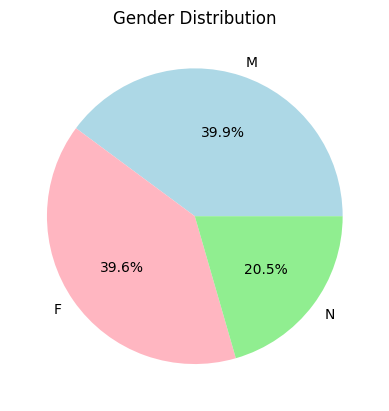

In [117]:
df_students['sex'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'lightpink', 'lightgreen'], title='Gender Distribution')
plt.ylabel('')
plt.show()


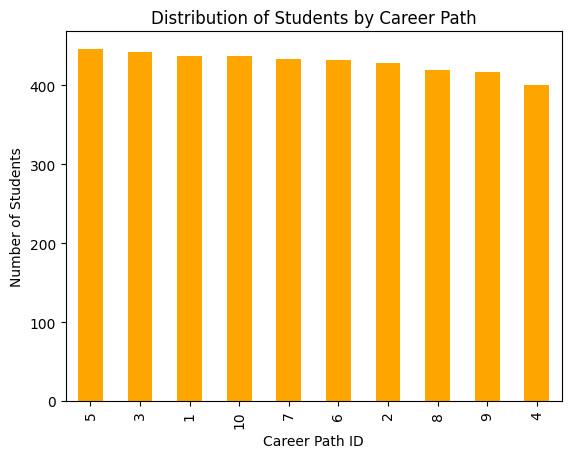

In [118]:
df_students['current_career_path_id'].value_counts().plot(kind='bar', color='orange', title='Distribution of Students by Career Path')
plt.xlabel('Career Path ID')
plt.ylabel('Number of Students')
plt.show()


Now when the data is cleaned I need to save it back to database.

In [119]:
from sqlalchemy import MetaData, Table, Column, Integer, String, DateTime, Float, text

# Define new table schemas
metadata = MetaData()

cademycode_students2 = Table(
    'cademycode_students2',
    metadata,
    Column('uuid', Integer, primary_key=True),
    Column('name', String),
    Column('dob', DateTime),
    Column('sex', String),
    Column('contact_info', String),
    Column('job_id', Integer),
    Column('num_course_taken', Integer),
    Column('current_career_path_id', Integer),
    Column('time_spent_hrs', Float)
)

cademycode_jobs2 = Table(
    'cademycode_jobs2',
    metadata,
    Column('job_id', Integer, primary_key=True),
    Column('job_category', String),
    Column('avg_salary', Integer)
)

cademycode_courses2 = Table(
    'cademycode_courses2',
    metadata,
    Column('career_path_id', Integer, primary_key=True),
    Column('career_path_name', String),
    Column('hours_to_complete', Integer)
)

# Create new table
metadata.create_all(engine)

In [120]:
# Insert data into new tables
df_clean_students.to_sql('cademycode_students2', engine, if_exists='replace', index=False)
cleaned_df_jobs.to_sql('cademycode_jobs2', engine, if_exists='replace', index=False)
df_courses.to_sql('cademycode_courses2', engine, if_exists='replace', index=False)

# Drop old table and rename new table
with engine.connect() as conn:
    # Drop old table and rename new table
    drop_cademycode_students = text("DROP TABLE IF EXISTS cademycode_students")
    drop_cademycode_jobs = text("DROP TABLE IF EXISTS cademycode_student_jobs")
    drop_cademycode_courses = text("DROP TABLE IF EXISTS cademycode_courses")

    conn.execute(drop_cademycode_students)
    conn.execute(drop_cademycode_jobs)
    conn.execute(drop_cademycode_courses)

    # Execute ALTER TABLE statement to rename
    rename_drop_cademycode_students = text("ALTER TABLE cademycode_students2 RENAME TO cademycode_students")
    rename_drop_cademycode_jobs = text("ALTER TABLE cademycode_jobs2 RENAME TO cademycode_student_jobs")
    rename_drop_cademycode_courses = text("ALTER TABLE cademycode_courses2 RENAME TO cademycode_courses")

    conn.execute(rename_drop_cademycode_students)
    conn.execute(rename_drop_cademycode_jobs)
    conn.execute(rename_drop_cademycode_courses)

# Verify changes
df_students = pd.read_sql_table('cademycode_students', engine)
df_jobs = pd.read_sql_table('cademycode_student_jobs', engine)
df_courses = pd.read_sql_table('cademycode_courses', engine)


print(df_students.info())
print(df_jobs.info())
print(df_courses.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4293 entries, 0 to 4292
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   uuid                    4293 non-null   int64         
 1   name                    4293 non-null   object        
 2   dob                     4293 non-null   datetime64[ns]
 3   sex                     4293 non-null   object        
 4   contact_info            4293 non-null   object        
 5   job_id                  4293 non-null   int64         
 6   num_course_taken        4293 non-null   int64         
 7   current_career_path_id  4293 non-null   int64         
 8   time_spent_hrs          4293 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(4), object(3)
memory usage: 302.0+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---

# Create a merged CSV file

In [121]:
merged_df = pd.merge(df_students, df_jobs, on='job_id', how='inner')
merged_df = pd.merge(merged_df, df_courses, left_on='current_career_path_id', right_on='career_path_id', how='inner')

In [122]:
merged_df.to_csv('merged_data_initial.csv', index=False)